In [3]:
from scoring_v2 import score_url_v2
import pandas as pd
import re
from urllib.parse import urlparse
from rapidfuzz import fuzz
from collections import Counter
from datetime import datetime

# ============================================================
# 🧩 Scoring comparativo v1 vs v2 (1.7 interna)
# Dataset base: feed_scored_v1_20251010_165910_score_4to7.csv
# ============================================================

# 1️⃣ Cargar dataset principal
df = pd.read_csv("../../../data/interim/phishing/feed_scored_v1_20251010_165910_score_4to7.csv")
print(f"✅ Dataset cargado con {len(df)} URLs")

# 2️⃣ Cargar whitelist española
whitelist_path = "../../../docs/spanish_domains.csv"
spanish_whitelist = pd.read_csv(whitelist_path)["domain"].str.lower().tolist()
print(f"✅ Whitelist cargada con {len(spanish_whitelist)} dominios")

# 3️⃣ Aplicar nuevo sistema de scoring (v2)
print("\n🚀 Aplicando nuevo sistema de scoring (v2)...")
df["score_total_v2"], df["signals_v2"] = zip(*df["url"].map(lambda u: score_url_v2(u, spanish_whitelist)))

# 4️⃣ Añadir timestamp y versión de scoring
df["timestamp_v2"] = datetime.now().isoformat()
df["scoring_version_v2"] = "v2 (1.7 interna)"

# 5️⃣ Guardar resultados
output_path = "../../../data/interim/phishing/feed_scored_v2_20251013_test.csv"
df.to_csv(output_path, index=False)

print(f"\n✅ Archivo generado correctamente:")
print(f"📁 {output_path}")
print(f"🕐 Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("⚙️  Versión aplicada: v2 (1.7 interna)")


✅ Dataset cargado con 16098 URLs
✅ Whitelist cargada con 200 dominios

🚀 Aplicando nuevo sistema de scoring (v2)...

✅ Archivo generado correctamente:
📁 ../../../data/interim/phishing/feed_scored_v2_20251013_test.csv
🕐 Timestamp: 2025-10-13 23:13:03
⚙️  Versión aplicada: v2 (1.7 interna)


✅ Dataset cargado con 16098 URLs
📈 Columnas disponibles: ['url', 'score_total', 'signals_detected', 'timestamp', 'scoring_version', 'score_total_v2', 'signals_v2', 'timestamp_v2', 'scoring_version_v2']

📊 Estadísticas básicas:


,score_total,score_total_v2,delta_score
count,16098.00,16098.00,16098.00
mean,5.49,6.02,0.53
std,0.50,3.02,3.04
min,5.00,-4.00,-9.00
25%,5.00,4.00,-2.00
50%,5.00,6.00,1.00
75%,6.00,8.00,2.00
max,6.00,19.00,13.00



🔼 Score sube: 8115 URLs (50.4%)
🔽 Score baja: 6215 URLs (38.6%)
⏸️  Sin cambio: 1768 URLs (11.0%)


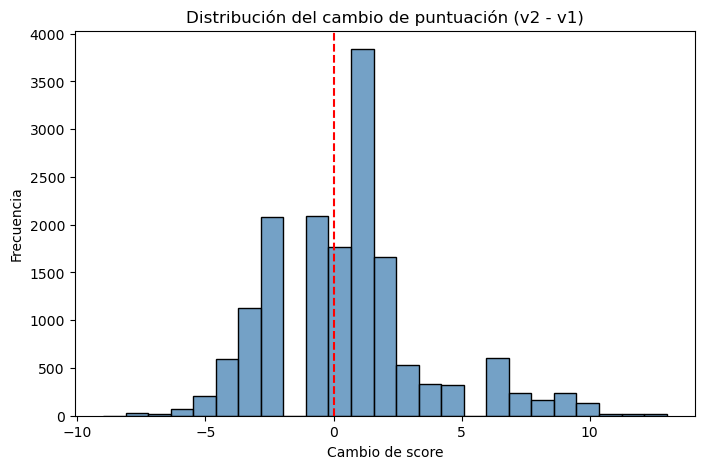

In [4]:
# === 1️⃣ Cargar dataset ===
df = pd.read_csv("../../../data/interim/phishing/feed_scored_v2_20251013_test.csv")
print(f"✅ Dataset cargado con {len(df)} URLs")
print(f"📈 Columnas disponibles: {df.columns.tolist()}")

# === 2️⃣ Calcular cambio de score ===
df["delta_score"] = df["score_total_v2"] - df["score_total"]

# === 3️⃣ Resumen descriptivo ===
print("\n📊 Estadísticas básicas:")
display(df[["score_total", "score_total_v2", "delta_score"]].describe().round(2))

# === 4️⃣ Conteo de cambios ===
up = (df["delta_score"] > 0).sum()
down = (df["delta_score"] < 0).sum()
same = (df["delta_score"] == 0).sum()
total = len(df)

print(f"\n🔼 Score sube: {up} URLs ({up/total:.1%})")
print(f"🔽 Score baja: {down} URLs ({down/total:.1%})")
print(f"⏸️  Sin cambio: {same} URLs ({same/total:.1%})")

# === 5️⃣ Visualización de cambios ===
plt.figure(figsize=(8,5))
sns.histplot(df["delta_score"], bins=25, kde=False, color="steelblue")
plt.title("Distribución del cambio de puntuación (v2 - v1)")
plt.xlabel("Cambio de score")
plt.ylabel("Frecuencia")
plt.axvline(0, color="red", linestyle="--")
plt.show()

In [5]:
# ============================================================
# 🔍 Análisis de impacto del nuevo scoring
# ============================================================

# URLs con aumento
urls_up = df[df["delta_score"] > 0].sort_values("delta_score", ascending=False)
# URLs con descenso
urls_down = df[df["delta_score"] < 0].sort_values("delta_score", ascending=True)

print("\n🔼 Ejemplos con mayor incremento:")
display(urls_up[["url", "score_total", "score_total_v2", "delta_score", "signals_v2"]].head(10))

print("\n🔽 Ejemplos con mayor descenso:")
display(urls_down[["url", "score_total", "score_total_v2", "delta_score", "signals_v2"]].head(10))



🔼 Ejemplos con mayor incremento:


,url,score_total,score_total_v2,delta_score,signals_v2
12663,https://seguridad-gestion-b1032f.ingress-compo...,6,19,13,spanish_brand:bankinter;spanish_brand:ing;span...
8436,https://gestin-particulares-es-6-bd6def.ingres...,6,19,13,spanish_brand:ing;spanish_brand:correos;spanis...
8435,https://gestin-particulares-es-6-bd6def.ingres...,6,19,13,spanish_brand:ing;spanish_brand:correos;spanis...
8434,https://gestin-particulares-es-2-be259a.ingres...,6,19,13,spanish_brand:ing;spanish_brand:correos;spanis...
8433,https://gestin-particulares-es-2-be259a.ingres...,6,19,13,spanish_brand:ing;spanish_brand:correos;spanis...
8432,https://gestin-particulares-es-1-bc3294.ingres...,6,19,13,spanish_brand:ing;spanish_brand:correos;spanis...
8431,https://gestin-particulares-es-1-bc3294.ingres...,6,19,13,spanish_brand:ing;spanish_brand:correos;spanis...
7175,https://entrega-estndar-baf1d3.ingress-baronn....,6,19,13,spanish_brand:ing;spanish_brand:correos;spanis...
7174,https://entrega-estndar-baf1d3.ingress-baronn....,6,19,13,spanish_brand:ing;spanish_brand:correos;spanis...
8568,https://groupocoroeoss-bd38c7.ingress-erytho.e...,6,19,13,spanish_brand:ing;spanish_brand:correos;spanis...



🔽 Ejemplos con mayor descenso:


,url,score_total,score_total_v2,delta_score,signals_v2
8268,https://franquicias-academiasdeingles.es/wp-in...,5,-4,-9,spanish_brand:ing;spanish_marker:.es;ing_false...
10381,https://marketingtechnologies.es/wp-admin/whid...,5,-4,-9,spanish_brand:ing;spanish_marker:.es;ing_false...
8425,https://gerberagardeningservices.com.au/.conta...,6,-2,-8,spanish_brand:ing;brand_in_subdomain;pt_kw:con...
4598,https://asesoriabarrachina.es/wp-includes/font...,5,-3,-8,spanish_marker:.es;compromised_host_es
4600,https://asesoriabarrachina.es/wp-includes/font...,5,-3,-8,spanish_marker:.es;compromised_host_es
4601,https://asesoriabarrachina.es/wp-includes/imag...,5,-3,-8,spanish_marker:.es;compromised_host_es
4603,https://asesoriabarrachina.es/wp-includes/strato,5,-3,-8,spanish_marker:.es;compromised_host_es
4604,https://asesoriabarrachina.es/wp-includes/stra...,5,-3,-8,spanish_marker:.es;compromised_host_es
4605,https://asesoriabarrachina.es/wp-includes/stra...,5,-3,-8,spanish_marker:.es;compromised_host_es
9155,http://singularprintrj.com.br/newsmtb/bigfarme...,6,-2,-8,spanish_brand:ing;brand_in_subdomain;latam_tld...


In [6]:
# ============================================================
# 🧠 Análisis de señales nuevas v2
# ============================================================

from collections import Counter

def contar_senales(signals_series):
    todas = ";".join(signals_series.dropna().astype(str).tolist()).split(";")
    todas = [s.strip() for s in todas if s.strip()]
    return Counter(todas)

signals_v2_counter = contar_senales(df["signals_v2"])

print(f"📡 Total de señales únicas detectadas: {len(signals_v2_counter)}")
print("\n🔝 Principales señales nuevas en v2:")
for s, n in signals_v2_counter.most_common(15):
    print(f"{s:<35} {n:>6}")


📡 Total de señales únicas detectadas: 159

🔝 Principales señales nuevas en v2:
spanish_brand:ing                    14541
brand_in_subdomain                   13196
brand_global_tld_boost                7063
tld_riesgo_alto                       5904
english_term_in_path                  5811
host_ingress_pattern                  4591
brand_and_spanish_token_boost         4421
spanish_token:login                   2923
ing_false_positive                    2483
brand_in_path:ing                     1556
foreign_tld_but_es_context            1413
shortener_spain                       1075
spanish_brand:orange                   858
fuzzy_whitelist_match:uco.es:80        708
ing_path_exception                     643


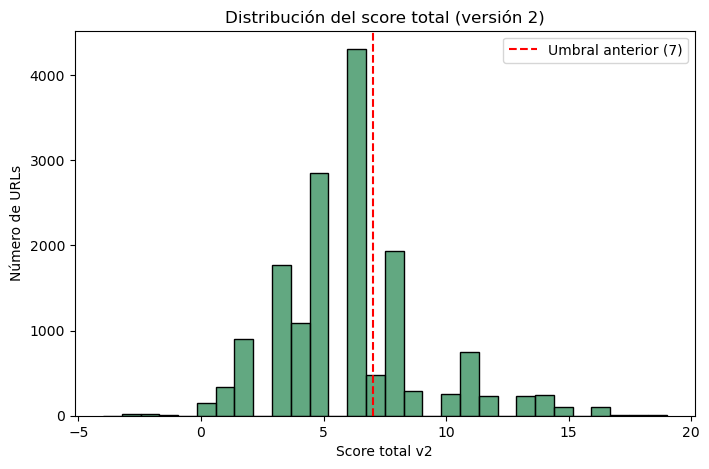


📏 Recuento por tramos de score:
score_range_v2
(0, 3]      2999
(3, 5]      3941
(5, 7]      4784
(7, 9]      2229
(9, 11]     1000
(11, 13]     458
(13, 15]     343
Name: count, dtype: int64


In [7]:
# ============================================================
# ⚖️ Evaluación del umbral óptimo
# ============================================================

plt.figure(figsize=(8,5))
sns.histplot(df["score_total_v2"], bins=30, color="seagreen")
plt.title("Distribución del score total (versión 2)")
plt.xlabel("Score total v2")
plt.ylabel("Número de URLs")
plt.axvline(7, color="red", linestyle="--", label="Umbral anterior (7)")
plt.legend()
plt.show()

print("\n📏 Recuento por tramos de score:")
bins = [0, 3, 5, 7, 9, 11, 13, 15]
df["score_range_v2"] = pd.cut(df["score_total_v2"], bins=bins)
print(df["score_range_v2"].value_counts().sort_index())


In [9]:
# === URLs con score más alto (potenciales falsos positivos o campañas muy fuertes)
df.sort_values("score_total_v2", ascending=False).head(15)[["url", "score_total", "score_total_v2", "signals_v2"]]

# === URLs con score muy bajo (penalizaciones fuertes)
df.sort_values("score_total_v2", ascending=True).head(15)[["url", "score_total", "score_total_v2", "signals_v2"]]


,url,score_total,score_total_v2,signals_v2
10381,https://marketingtechnologies.es/wp-admin/whid...,5,-4,spanish_brand:ing;spanish_marker:.es;ing_false...
8268,https://franquicias-academiasdeingles.es/wp-in...,5,-4,spanish_brand:ing;spanish_marker:.es;ing_false...
5375,https://brives15.es/wp-content/plugins/prepaid...,5,-3,spanish_marker:.es;compromised_host_es
4598,https://asesoriabarrachina.es/wp-includes/font...,5,-3,spanish_marker:.es;compromised_host_es
4600,https://asesoriabarrachina.es/wp-includes/font...,5,-3,spanish_marker:.es;compromised_host_es
4601,https://asesoriabarrachina.es/wp-includes/imag...,5,-3,spanish_marker:.es;compromised_host_es
4602,https://asesoriabarrachina.es/wp-includes/imag...,5,-3,spanish_marker:.es;compromised_host_es
4603,https://asesoriabarrachina.es/wp-includes/strato,5,-3,spanish_marker:.es;compromised_host_es
16003,http://www.essenceofbeing.com/wp-content/uploa...,5,-3,spanish_brand:ing;spanish_marker:.es;english_t...
4604,https://asesoriabarrachina.es/wp-includes/stra...,5,-3,spanish_marker:.es;compromised_host_es


In [ ]:
# ============================================================
# 🧹 Separar infraestructura comprometida y falsos positivos
# ============================================================

mask_compromised = df["signals_v2"].str.contains("compromised_host_es", na=False)
mask_false_ing = df["signals_v2"].str.contains("ing_false_positive", na=False)

infra_comprometida = df[mask_compromised | mask_false_ing].copy()
resto = df[~(mask_compromised | mask_false_ing)].copy()

print(f"🏗️  Infraestructura comprometida o falsos positivos detectados: {len(infra_comprometida)} URLs")
print(f"📦  Resto del dataset legítimo para análisis: {len(resto)} URLs")

# Guarda aparte
infra_comprometida.to_csv("../../../data/interim/phishing/dataset_infra_es_comprometida.csv", index=False)
resto.to_csv("../../../data/interim/phishing/feed_scored_v2_clean.csv", index=False)


In [10]:
# ============================================================
# 🧹 Separar infraestructura comprometida y falsos positivos
# ============================================================

mask_compromised = df["signals_v2"].str.contains("compromised_host_es", na=False)
mask_false_ing = df["signals_v2"].str.contains("ing_false_positive", na=False)

infra_comprometida = df[mask_compromised | mask_false_ing].copy()
resto = df[~(mask_compromised | mask_false_ing)].copy()

print(f"🏗️  Infraestructura comprometida o falsos positivos detectados: {len(infra_comprometida)} URLs")
print(f"📦  Resto del dataset legítimo para análisis: {len(resto)} URLs")

# Guarda aparte
infra_comprometida.to_csv("../../../data/interim/phishing/dataset_infra_es_comprometida.csv", index=False)
resto.to_csv("../../../data/interim/phishing/feed_scored_v2_clean.csv", index=False)


🏗️  Infraestructura comprometida o falsos positivos detectados: 2550 URLs
📦  Resto del dataset legítimo para análisis: 13548 URLs


In [11]:
# ============================================================
# 🚨 URLs con puntuaciones más altas (phishing fuerte)
# ============================================================

top_high = resto.sort_values("score_total_v2", ascending=False).head(10)
display(top_high[["url", "score_total", "score_total_v2", "signals_v2"]])


,url,score_total,score_total_v2,signals_v2
8431,https://gestin-particulares-es-1-bc3294.ingres...,6,19,spanish_brand:ing;spanish_brand:correos;spanis...
8435,https://gestin-particulares-es-6-bd6def.ingres...,6,19,spanish_brand:ing;spanish_brand:correos;spanis...
7175,https://entrega-estndar-baf1d3.ingress-baronn....,6,19,spanish_brand:ing;spanish_brand:correos;spanis...
8433,https://gestin-particulares-es-2-be259a.ingres...,6,19,spanish_brand:ing;spanish_brand:correos;spanis...
8432,https://gestin-particulares-es-1-bc3294.ingres...,6,19,spanish_brand:ing;spanish_brand:correos;spanis...
8430,https://gestin-particulares-es-10-b934ac.ingre...,6,19,spanish_brand:ing;spanish_brand:correos;spanis...
12664,https://seguridad-gestion-b1032f.ingress-compo...,6,19,spanish_brand:bankinter;spanish_brand:ing;span...
12663,https://seguridad-gestion-b1032f.ingress-compo...,6,19,spanish_brand:bankinter;spanish_brand:ing;span...
8429,https://gestin-particulares-es-10-b934ac.ingre...,6,19,spanish_brand:ing;spanish_brand:correos;spanis...
8434,https://gestin-particulares-es-2-be259a.ingres...,6,19,spanish_brand:ing;spanish_brand:correos;spanis...


In [12]:
# ============================================================
# 📉 Señales penalizadoras (scores que bajan)
# ============================================================

negativas = [s for s in signals_v2_counter if any(k in s for k in [
    "false", "penalty", "foreign", "english", "compromised", "risk", "tld_riesgo_alto"
])]

for s in sorted(negativas, key=lambda x: signals_v2_counter[x], reverse=True)[:15]:
    print(f"{s:<40} {signals_v2_counter[s]:>6}")


tld_riesgo_alto                            5904
english_term_in_path                       5811
ing_false_positive                         2483
foreign_tld_but_es_context                 1413
compromised_host_es                          69


In [13]:
# ============================================================
# 🚨 Casos límite: grandes variaciones en el score
# ============================================================

# Definir umbrales
TH_NEG = -3
TH_POS = 10

# Calcular delta
df["delta_score"] = df["score_total_v2"] - df["score_total"]

# Casos con caída fuerte
down = df[df["delta_score"] <= TH_NEG][["url", "score_total", "score_total_v2", "signals_v2"]].head(20)

# Casos con subida extrema
up = df[df["delta_score"] >= TH_POS][["url", "score_total", "score_total_v2", "signals_v2"]].head(20)

print(f"🔻 Caídas fuertes detectadas: {len(df[df['delta_score'] <= TH_NEG])}")
print(f"🔺 Subidas fuertes detectadas: {len(df[df['delta_score'] >= TH_POS])}")

print("\n=== 🔻 Ejemplos de URLs con caída de puntuación ===")
display(down)

print("\n=== 🔺 Ejemplos de URLs con subida de puntuación ===")
display(up)


🔻 Caídas fuertes detectadas: 2051
🔺 Subidas fuertes detectadas: 183

=== 🔻 Ejemplos de URLs con caída de puntuación ===


,url,score_total,score_total_v2,signals_v2
15,http://0fficevoicingforyoutolistenontimebefore...,6,2,spanish_brand:ing;brand_in_subdomain;tld_riesg...
18,http://157.230.187.218/directing/www.atbonline...,5,2,spanish_brand:ing;brand_in_path:ing;english_te...
45,http://217.8.117.39/telus/directing/www.atbonl...,5,2,spanish_brand:ing;brand_in_path:ing;english_te...
46,http://217.8.117.39/virgin/directing/www.atbon...,5,2,spanish_brand:ing;brand_in_path:ing;english_te...
50,http://2879471.jm533750.web.hosting-test.net/5...,6,3,spanish_brand:ing;brand_global_tld_boost
57,http://3opqgzo7ypusuestivdlcb2bev8gqzooj7k6gyf...,5,0,spanish_brand:ing;brand_in_subdomain;english_t...
58,http://3r1984-officealertingservices.vercel.app,6,3,spanish_brand:ing;brand_in_subdomain;brand_glo...
60,http://46.21.147.14/directing/www.atbonline.co...,5,2,spanish_brand:ing;brand_in_path:ing;english_te...
61,http://46.21.147.227/directing/www.atbonline.c...,5,2,spanish_brand:ing;brand_in_path:ing;english_te...
62,http://52.216.109.37/kajabi-storefronts-produc...,5,2,spanish_brand:ing;brand_in_path:ing;english_te...



=== 🔺 Ejemplos de URLs con subida de puntuación ===


,url,score_total,score_total_v2,signals_v2
1,http://0c4d4e6.wcomhost.com/banco-santander/pa...,6,16,spanish_brand:santander;spanish_token:banco;sp...
2,http://0c4d4e6.wcomhost.com/Banco-Santander/pa...,6,16,spanish_brand:santander;spanish_token:banco;sp...
568,http://correos-esxpress.tempurl.host/correos-e...,5,15,spanish_brand:correos;spanish_token:paquete;sp...
569,http://correos-esxpress.tempurl.host/es/recibi...,5,15,spanish_brand:correos;spanish_token:paquete;sp...
573,http://correos-spain.tempurl.host/es/recibir_p...,5,15,spanish_brand:correos;spanish_token:paquete;sp...
576,http://correos-tracking.tempurl.host/es/recibi...,6,16,spanish_brand:ing;spanish_brand:correos;spanis...
897,http://freelancer-blog-b72d03.ingress-earth.ew...,5,15,spanish_brand:ing;spanish_token:login;spanish_...
2792,http://particulares-bancosantander-es.tempurl....,5,16,spanish_brand:santander;spanish_token:banco;sp...
2796,http://particulares-santanderes.10web.site/wp-...,6,16,spanish_brand:santander;spanish_brand:orange;s...
2797,http://particulares-santanderes.10web.site/wp-...,6,16,spanish_brand:santander;spanish_brand:orange;s...


In [14]:
# ============================================================
# 🧩 Muestras de control: caídas fuertes vs subidas fuertes
# ============================================================

# Definir umbrales
TH_NEG = -3
TH_POS = 10

# Calcular delta
df["delta_score"] = df["score_total_v2"] - df["score_total"]

# Seleccionar muestras
sample_down = df[df["delta_score"] <= TH_NEG].sample(20, random_state=42)[["url", "score_total", "score_total_v2", "signals_v2"]]
sample_up = df[df["delta_score"] >= TH_POS].sample(20, random_state=42)[["url", "score_total", "score_total_v2", "signals_v2"]]

# Mostrar resultados
print("🔻 Ejemplos de URLs penalizadas (caídas fuertes):")
display(sample_down)

print("\n🔺 Ejemplos de URLs reforzadas (subidas fuertes):")
display(sample_up)


🔻 Ejemplos de URLs penalizadas (caídas fuertes):


,url,score_total,score_total_v2,signals_v2
9917,https://loving-bose.198-46-171-27.plesk.page/w...,5,2,spanish_brand:ing;brand_in_subdomain;english_t...
958,http://go.redirectingat.com/?id=355X561&test=o...,6,3,spanish_brand:ing;brand_global_tld_boost;short...
14872,https://www.eservicebits.com/landingpages/dd26...,5,2,spanish_brand:ing;spanish_marker:.es;brand_in_...
14803,https://www.eservicebits.com/landingpages/7157...,5,2,spanish_brand:ing;spanish_marker:.es;brand_in_...
12961,https://singmalay-room.on-access7.asia/index.html,5,0,spanish_brand:ing;brand_in_subdomain;english_t...
551,http://confirm-infringement-ads-fb.netlify.app...,6,3,spanish_brand:ing;brand_in_subdomain;brand_glo...
365,http://booking.com-eu.property541722.homes/m/p...,6,3,spanish_brand:ing;brand_in_subdomain
13558,https://testingchase.duckdns.org/3e8ab6854/e31...,6,3,spanish_brand:ing;brand_in_subdomain;brand_glo...
14795,https://www.eservicebits.com/landingpages/214d...,5,2,spanish_brand:ing;spanish_marker:.es;brand_in_...
9950,https://loving-bose.198-46-171-27.plesk.page/w...,5,2,spanish_brand:ing;brand_in_subdomain;english_t...



🔺 Ejemplos de URLs reforzadas (subidas fuertes):


,url,score_total,score_total_v2,signals_v2
3786,https://74136-95ec6b.ingress-bonde.ewp.live/pa...,6,16,spanish_brand:ing;spanish_token:pago;spanish_t...
6179,https://coreos-bc9e28.ingress-erytho.ewp.live/...,6,16,spanish_brand:ing;spanish_token:pago;spanish_t...
12663,https://seguridad-gestion-b1032f.ingress-compo...,6,19,spanish_brand:bankinter;spanish_brand:ing;span...
8430,https://gestin-particulares-es-10-b934ac.ingre...,6,19,spanish_brand:ing;spanish_brand:correos;spanis...
11942,https://portalxciaxaparticularesloc16-b3cb76.i...,5,16,spanish_brand:ing;spanish_token:portal;spanish...
3659,https://3476-1-bce161.ingress-baronn.ewp.live/...,6,16,spanish_brand:ing;spanish_token:pago;spanish_t...
4774,https://b106ndzrt-bb8145.ingress-erytho.ewp.li...,6,16,spanish_brand:ing;spanish_token:pago;spanish_t...
6283,https://corriosgovr-bba72b.ingress-earth.ewp.l...,6,16,spanish_brand:ing;spanish_token:pago;spanish_t...
8436,https://gestin-particulares-es-6-bd6def.ingres...,6,19,spanish_brand:ing;spanish_brand:correos;spanis...
7093,https://efbr.com/bbva.banco/hazte-cliente/abri...,5,17,spanish_brand:bbva;spanish_token:cliente;spani...
